" TCS and RELIANCE stock price fetching and visaulizing"

In [ ]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError as rde
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

begin='2010-01-01'
end=str(datetime.now().strftime('%Y-%m-%d'))

s1='TCS.NS'
s2='RELIANCE.NS'
s3='AMZ'
s4='APPL'

def get_data(ticker):
  try:
    stock_data=data.DataReader(ticker,'yahoo',begin,end)
    print(clean_data(stock_data, 'Adj Close'))

  except rde:
    print('No data found')

get_data(s1)

2010-01-01            NaN
2010-01-02            NaN
2010-01-03            NaN
2010-01-04     279.167419
2010-01-05     279.241699
                 ...     
2020-09-20    2449.899902
2020-09-21    2465.300049
2020-09-22    2522.949951
2020-09-23    2467.449951
2020-09-24    2316.000000
Freq: D, Name: Adj Close, Length: 3920, dtype: float64


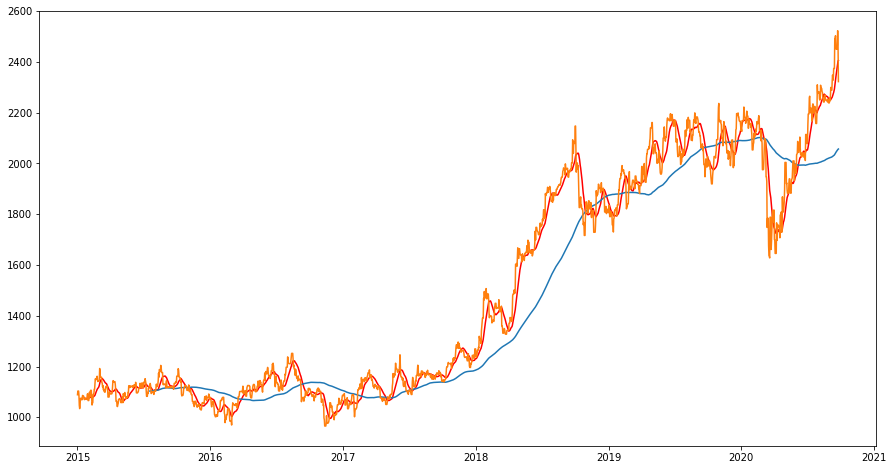

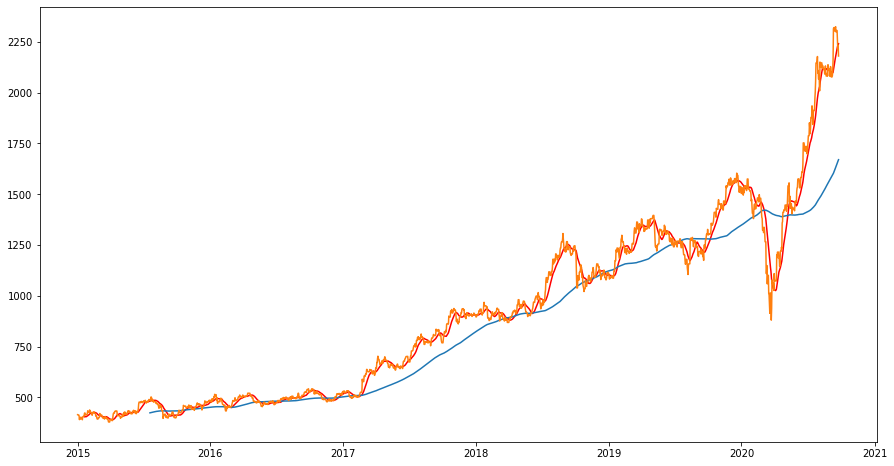

In [ ]:
def clean_data(stock_data, col):
  week=pd.date_range(start=begin, end=end)
  clean_data=stock_data[col].reindex(week)
  return clean_data.fillna(method='ffill')


def get_stats(stock_data):
  return {
      'last': np.mean(stock_data.tail(1)),
      'short_mean': np.mean(stock_data.tail(20)),
      'long_mean': np.mean(stock_data.tail(200)),
      'short_rolling': stock_data.rolling(window=20).mean(),
      'long_rolling' : stock_data.rolling(window=200).mean()
  }



def create_plot(stock_data, ticker):
  stats=get_stats(stock_data)
  plt.subplots(figsize=(15,8))
  plt.plot(stats['short_rolling'], label='20 day rolling mean', color='red')
  
  plt.plot(stats['long_rolling'], label='200 day rolling mean')
  plt.plot(stock_data, label=ticker)
  plt.show()

def get_data (ticker):
  try:
    stock_data=data.DataReader(ticker,'yahoo',begin,end)
    adj_close=clean_data(stock_data, 'Adj Close')
    create_plot(adj_close, ticker)
  
  except rde:
    print('No data found')

get_data(s1)
get_data(s2)

 


